In [1]:
from dateutil.parser import parse
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.rcParams.update({'figure.figsize':(10,7),'figure.dpi':120})

In [3]:
df=pd.read_csv('C://Users//91744//Downloads//sales forecast.csv')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,21-01-2014,23-01-2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,26-02-2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,26-02-2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,26-02-2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [4]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [5]:
OS= df.loc[df['Category']=='Office Supplies']
OS.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,09-06-2014,14-06-2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,09-06-2014,14-06-2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,09-06-2014,14-06-2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700


In [8]:
print('Starting date:',OS['Order Date'].min())
print('Ending date:',OS['Order Date'].max())

Starting date: 01-01-2017
Ending date: 31-12-2016


In [9]:
# Drop unrelevant variables:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']


OS.drop(cols, axis=1, inplace= True)
OS

C:\Users\91744\AppData\Local\Temp\ipykernel_28092\4102960986.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OS.drop(cols, axis=1, inplace= True)


,Order Date,Sales
2,12-06-2016,14.620
4,11-10-2015,22.368
6,09-06-2014,7.280
8,09-06-2014,18.504
9,09-06-2014,114.900
...,...,...
9982,22-09-2016,35.560
9984,17-05-2015,31.500
9985,17-05-2015,55.600
9992,26-02-2017,29.600


In [10]:
### Check out missing values:
OS.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [11]:
OS= OS.groupby('Order Date')['Sales'].sum().reset_index()
OS.head()

,Order Date,Sales
0,01-01-2017,506.338
1,01-02-2016,161.970
2,01-03-2014,303.216
3,01-03-2015,117.600
4,01-03-2016,389.300


In [15]:
import pandas as pd

# assuming date string format is 'DD-MM-YYYY'
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')

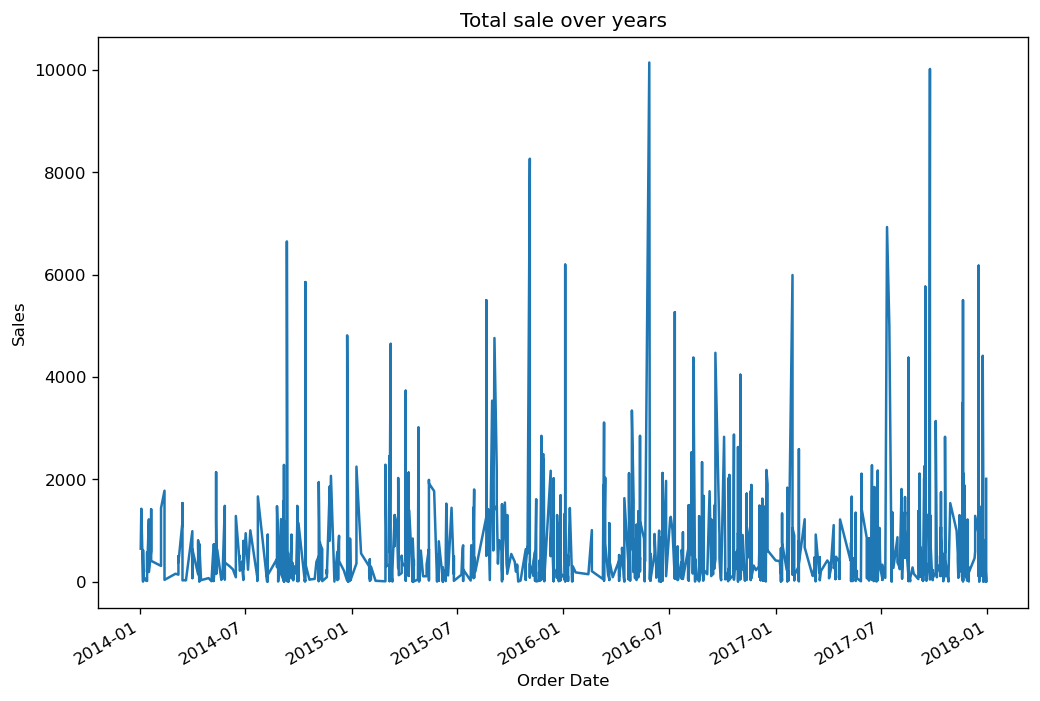

In [16]:
OS['Sales'].plot()
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Total sale over years')
plt.show()


In [17]:
#create new DataFrame
monthly_OS = pd.DataFrame()

monthly_OS['Sales'] = OS['Sales'].resample('MS').mean()

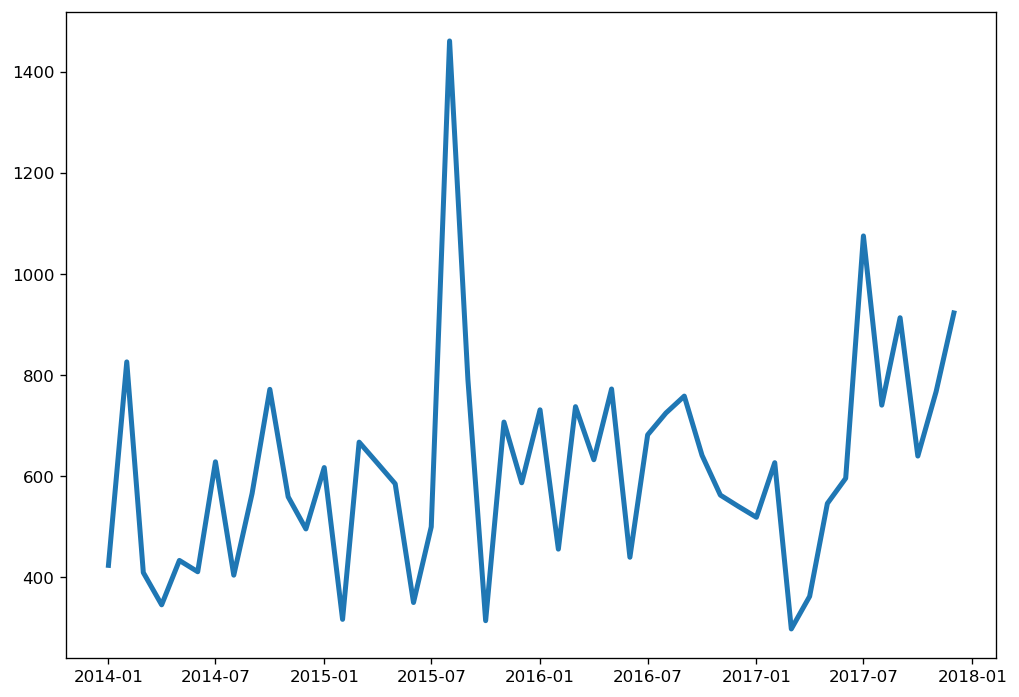

In [18]:
#plot weekly sales data
plt.plot(monthly_OS.index, monthly_OS.Sales, linewidth=3)

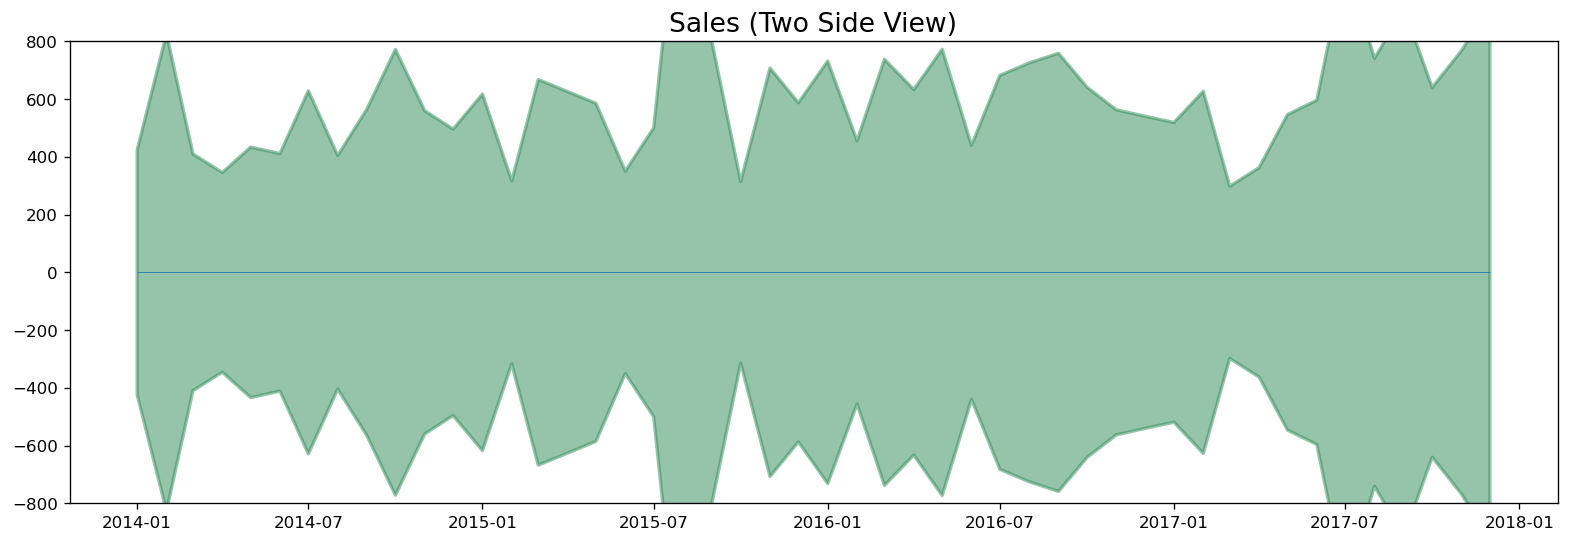

In [19]:
x= monthly_OS.index
y1= monthly_OS['Sales'].values

fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Sales (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(monthly_OS.index), xmax=np.max(monthly_OS.index), linewidth=.5)
plt.show()

In [20]:
OS['year'] = [d.year for d in OS.index]
OS['month'] = [d.strftime('%b') for d in OS.index]
years= OS['year'].unique()
years

array([2016, 2015, 2014, 2017], dtype=int64)

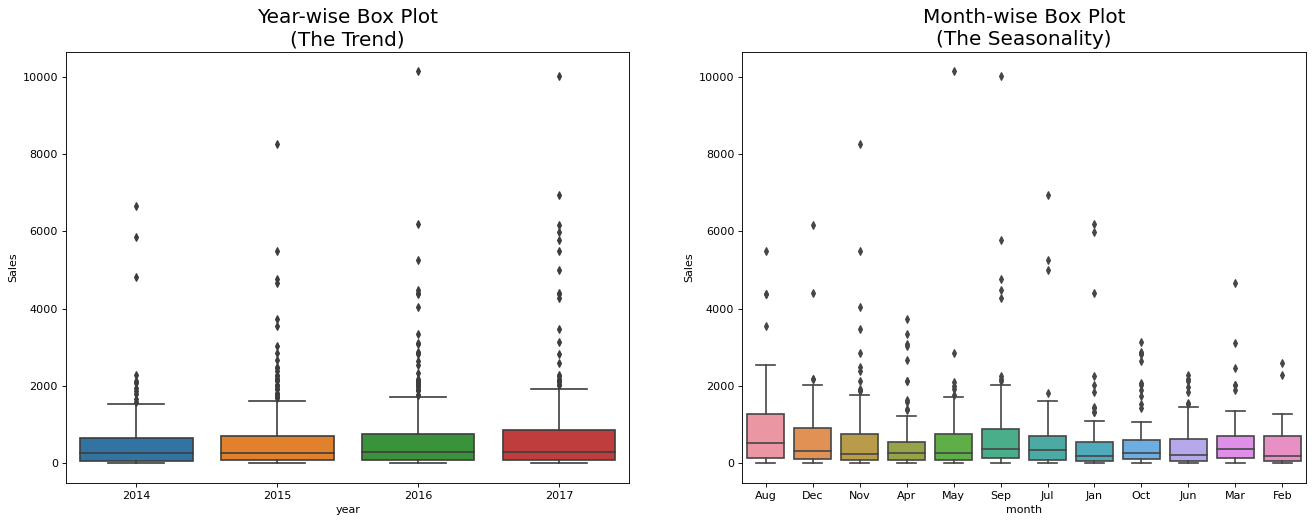

In [21]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Sales', data=OS, ax=axes[0])
sns.boxplot(x='month', y='Sales', data=OS.loc[~OS.year.isin([2014,2917]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

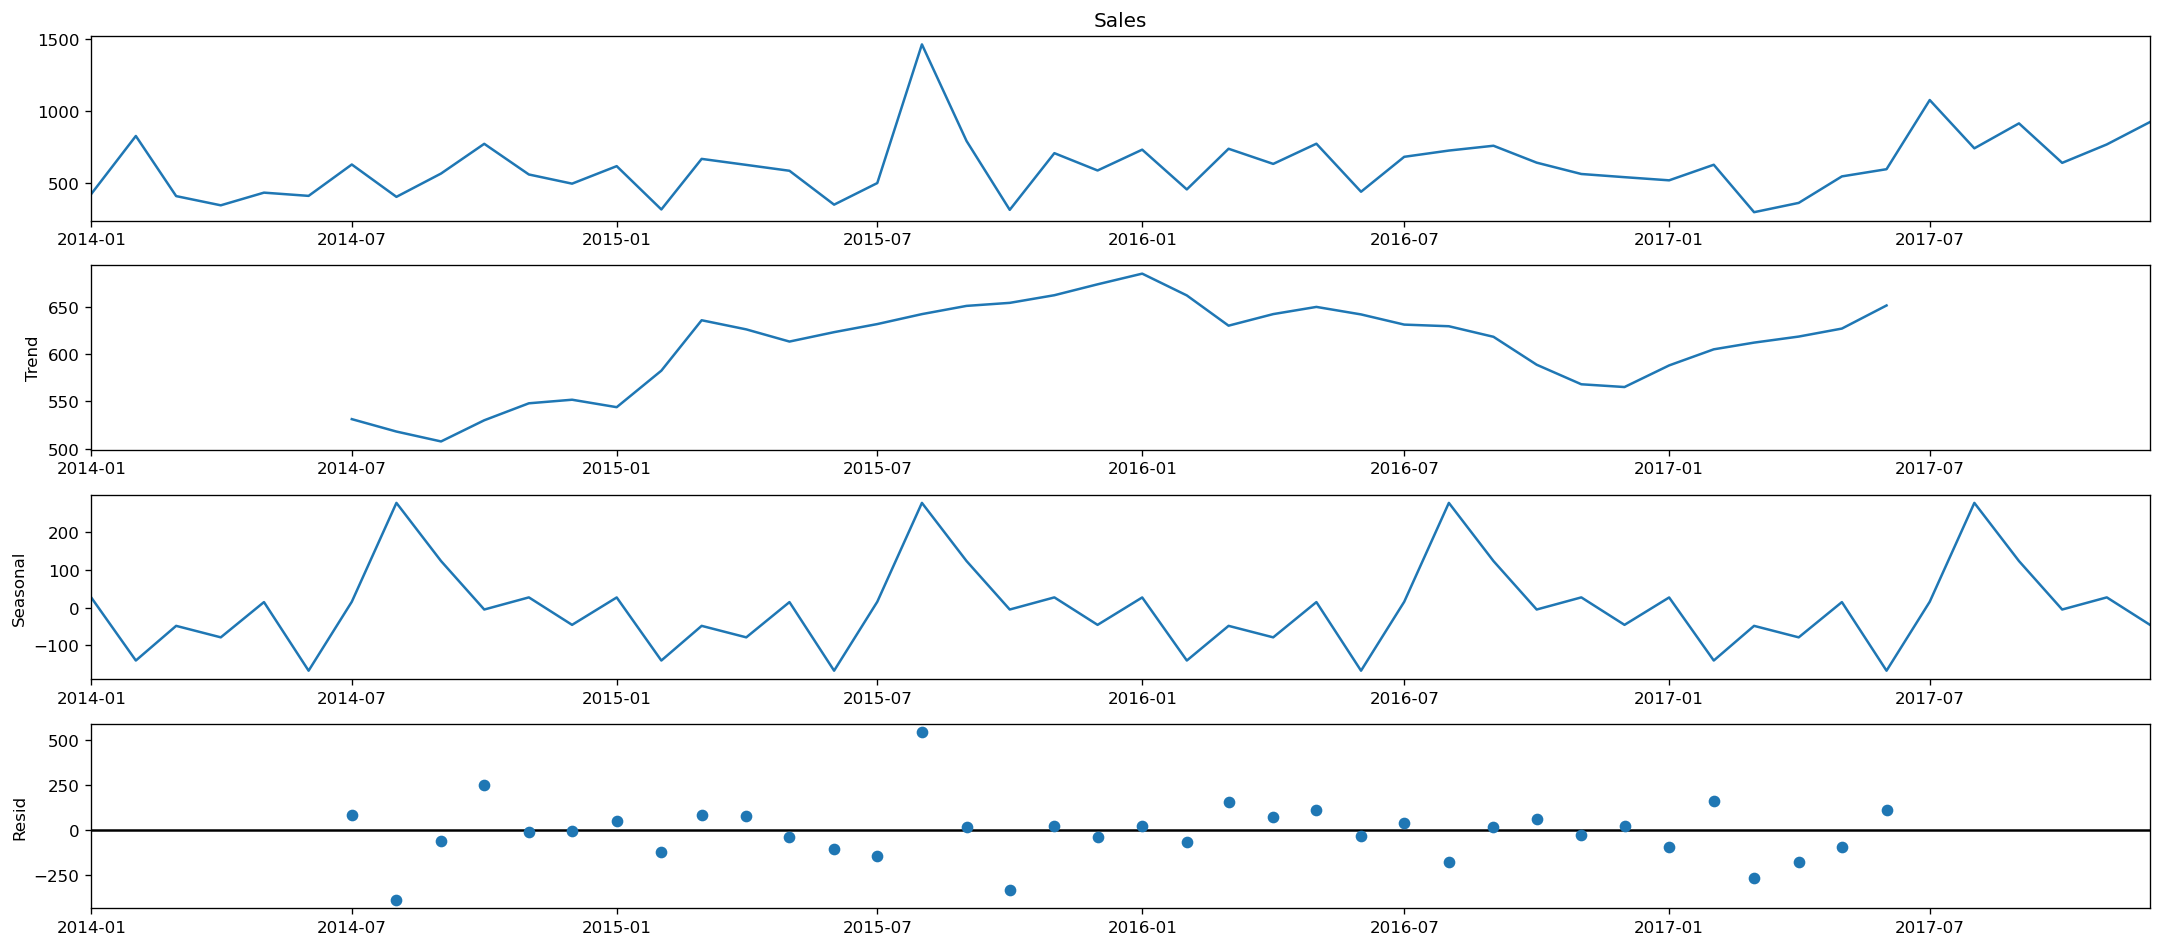

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(monthly_OS['Sales'], model='additive')
fig = decomposition.plot()
plt.show()

In [23]:
#Determing rolling statistics
moving_avg = monthly_OS.rolling(12).mean()
moving_std= monthly_OS.rolling(12).std()

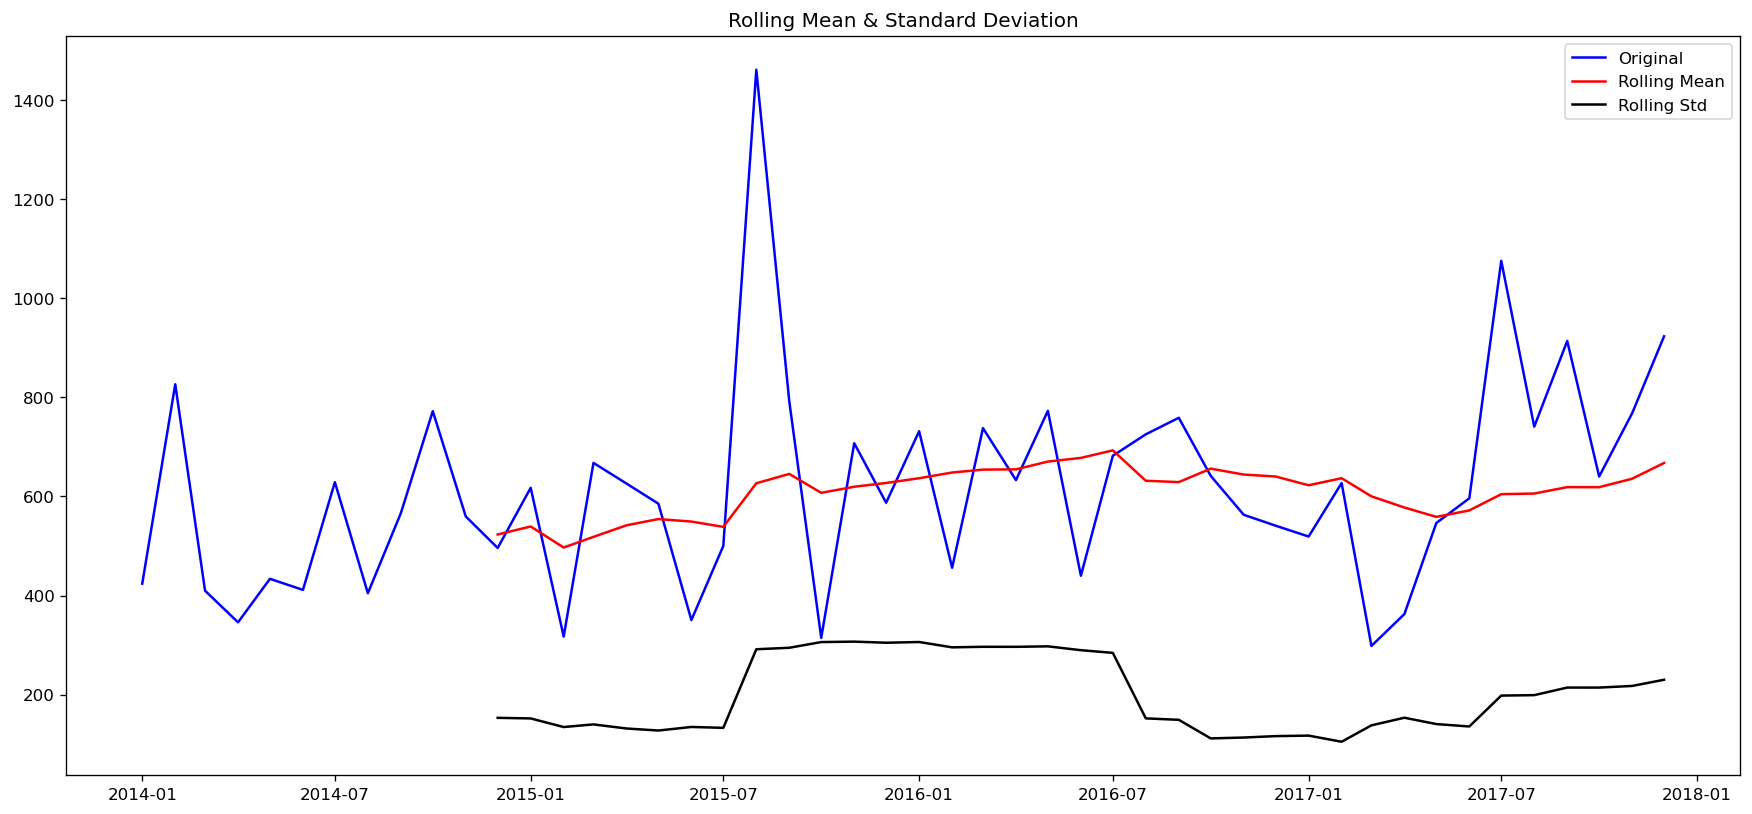

In [24]:
#Plot rolling statistics:
orig = plt.plot(monthly_OS, color='blue',label='Original')
mean = plt.plot(moving_avg, color='red', label='Rolling Mean')
std = plt.plot(moving_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [25]:
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(monthly_OS, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -5.867635e+00
p-value                        3.296791e-07
#Lags Used                     0.000000e+00
Number of Observations Used    4.700000e+01
Critical Value (1%)           -3.577848e+00
Critical Value (5%)           -2.925338e+00
Critical Value (10%)          -2.600774e+00
dtype: float64


In [31]:
do= pd.read_csv('C://Users//91744//Downloads//sales forecast.csv')
store= do.loc[do['Category']=='Office Supplies']
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
store.drop(cols, axis=1, inplace=True)
store

C:\Users\91744\AppData\Local\Temp\ipykernel_28092\1536706145.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store.drop(cols, axis=1, inplace=True)


,Order Date,Sales
2,12-06-2016,14.620
4,11-10-2015,22.368
6,09-06-2014,7.280
8,09-06-2014,18.504
9,09-06-2014,114.900
...,...,...
9982,22-09-2016,35.560
9984,17-05-2015,31.500
9985,17-05-2015,55.600
9992,26-02-2017,29.600


In [32]:
store = store.groupby('Order Date')['Sales'].sum().reset_index()
store

,Order Date,Sales
0,01-01-2017,506.338
1,01-02-2016,161.970
2,01-03-2014,303.216
3,01-03-2015,117.600
4,01-03-2016,389.300
...,...,...
1143,31-10-2016,1484.774
1144,31-10-2017,15.160
1145,31-12-2014,308.728
1146,31-12-2015,1366.584


In [33]:
store = store.set_index('Order Date')
store.index

Index(['01-01-2017', '01-02-2016', '01-03-2014', '01-03-2015', '01-03-2016',
       '01-04-2014', '01-04-2016', '01-04-2017', '01-05-2015', '01-05-2016',
       ...
       '31-08-2015', '31-08-2016', '31-08-2017', '31-10-2014', '31-10-2015',
       '31-10-2016', '31-10-2017', '31-12-2014', '31-12-2015', '31-12-2016'],
      dtype='object', name='Order Date', length=1148)

In [37]:
#create new DataFrame:
store.index = pd.to_datetime(store.index)

y = store['Sales'].resample('MS').mean()
import pandas as pd

# assuming date string format is 'DD-MM-YYYY'
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')

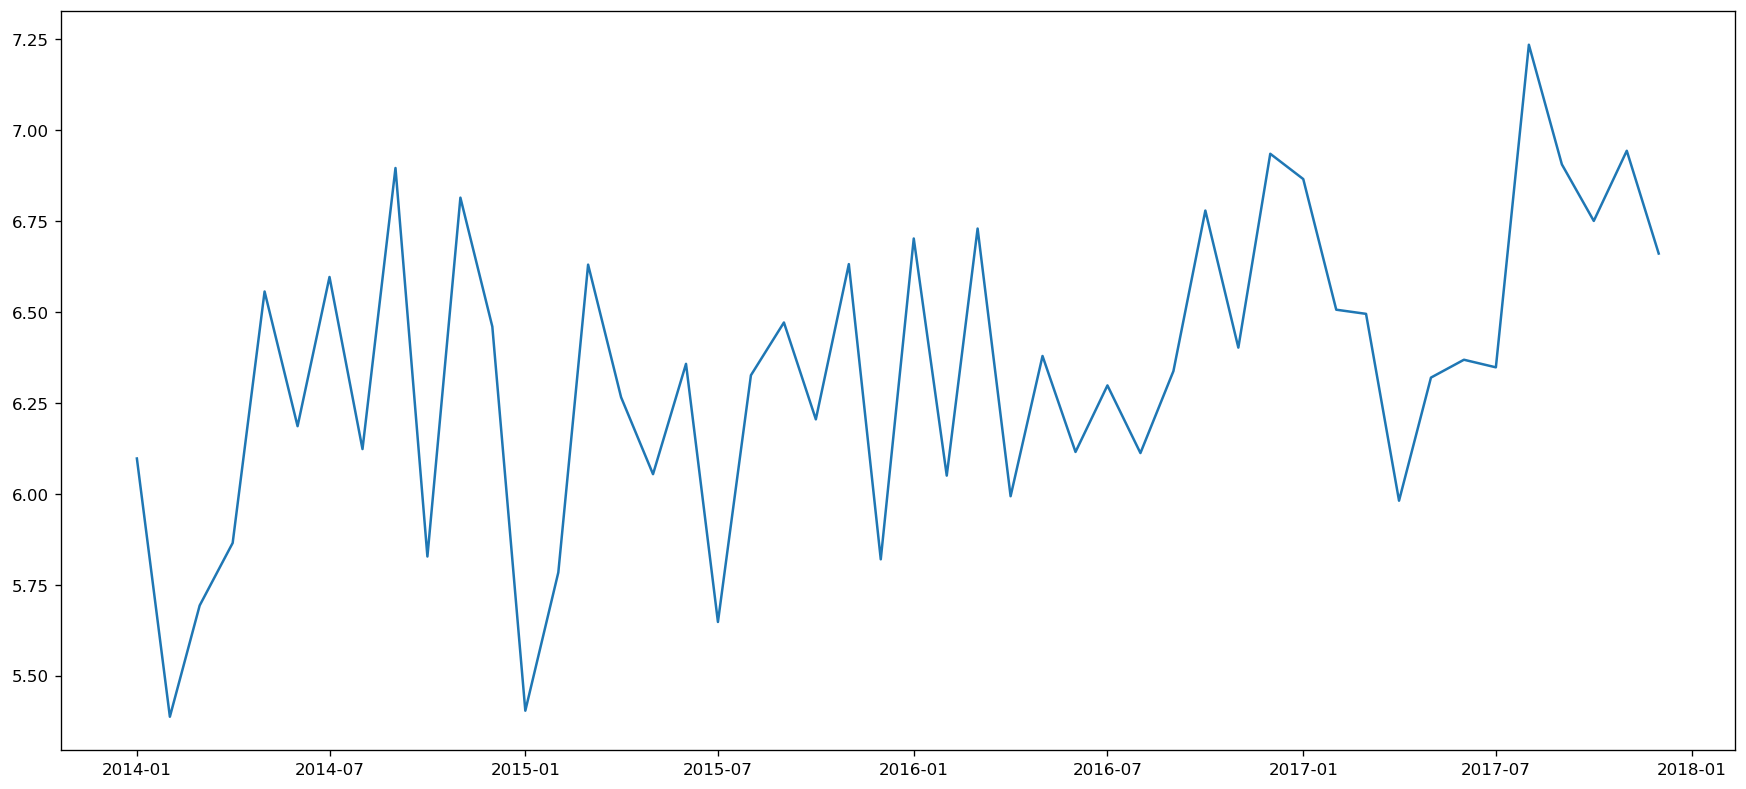

In [38]:
## Lets take a log transform here for simplicity:
ts_log = np.log(y)
plt.plot(ts_log)

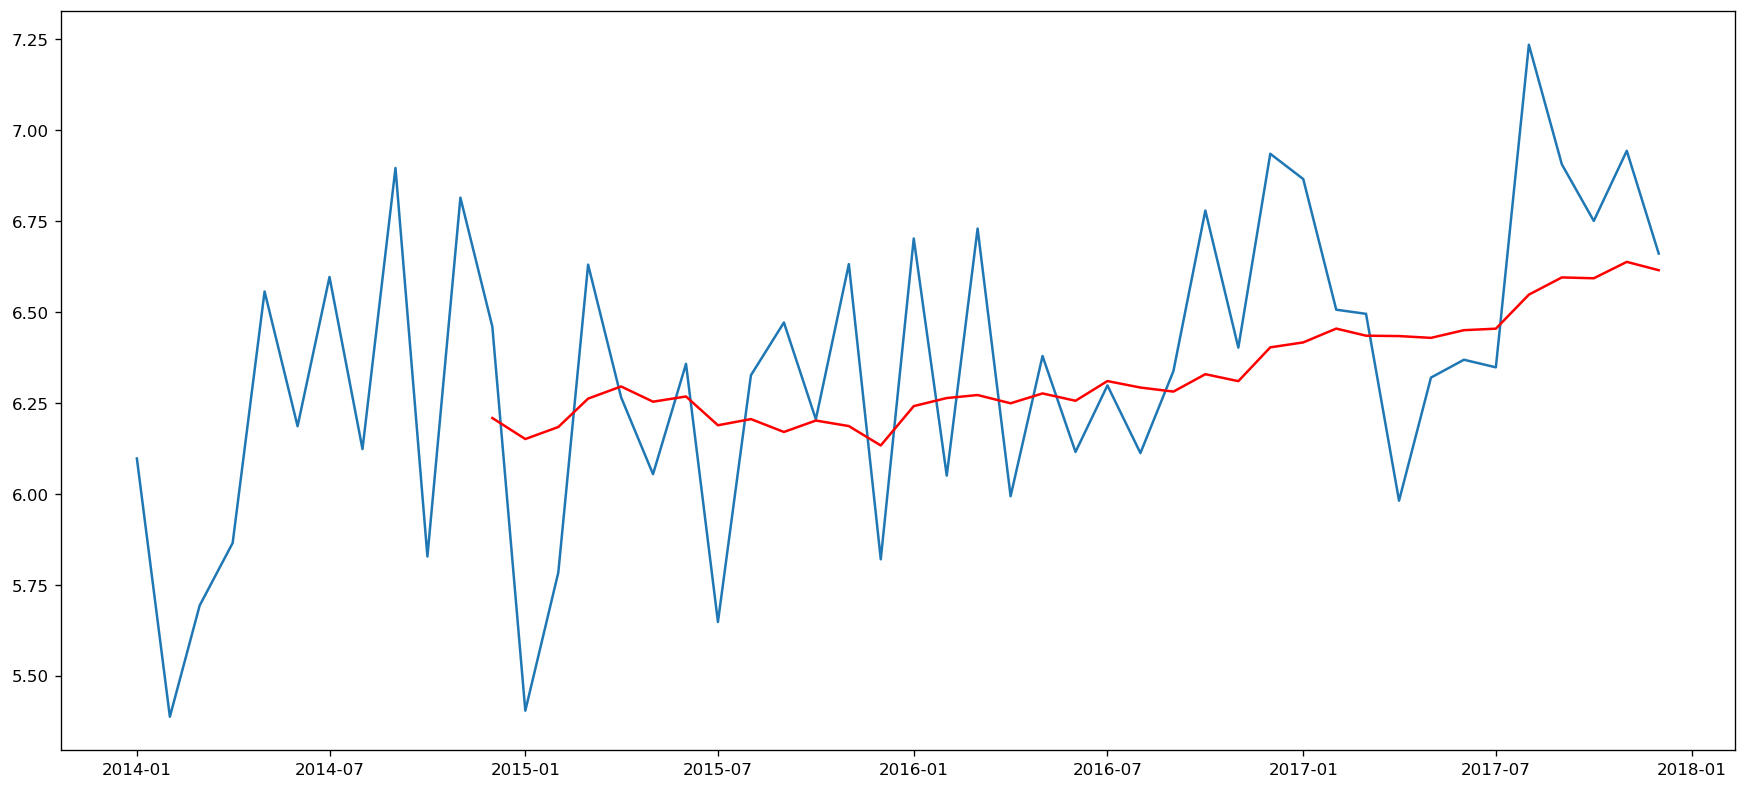

In [39]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [40]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Order Date
2014-01-01         NaN
2014-02-01         NaN
2014-03-01         NaN
2014-04-01         NaN
2014-05-01         NaN
2014-06-01         NaN
2014-07-01         NaN
2014-08-01         NaN
2014-09-01         NaN
2014-10-01         NaN
2014-11-01         NaN
2014-12-01    0.251449
Freq: MS, Name: Sales, dtype: float64

In [44]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print ('Results of Dickey-Fuller Test:')
    
    #Perform Dickey-Fuller test:
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

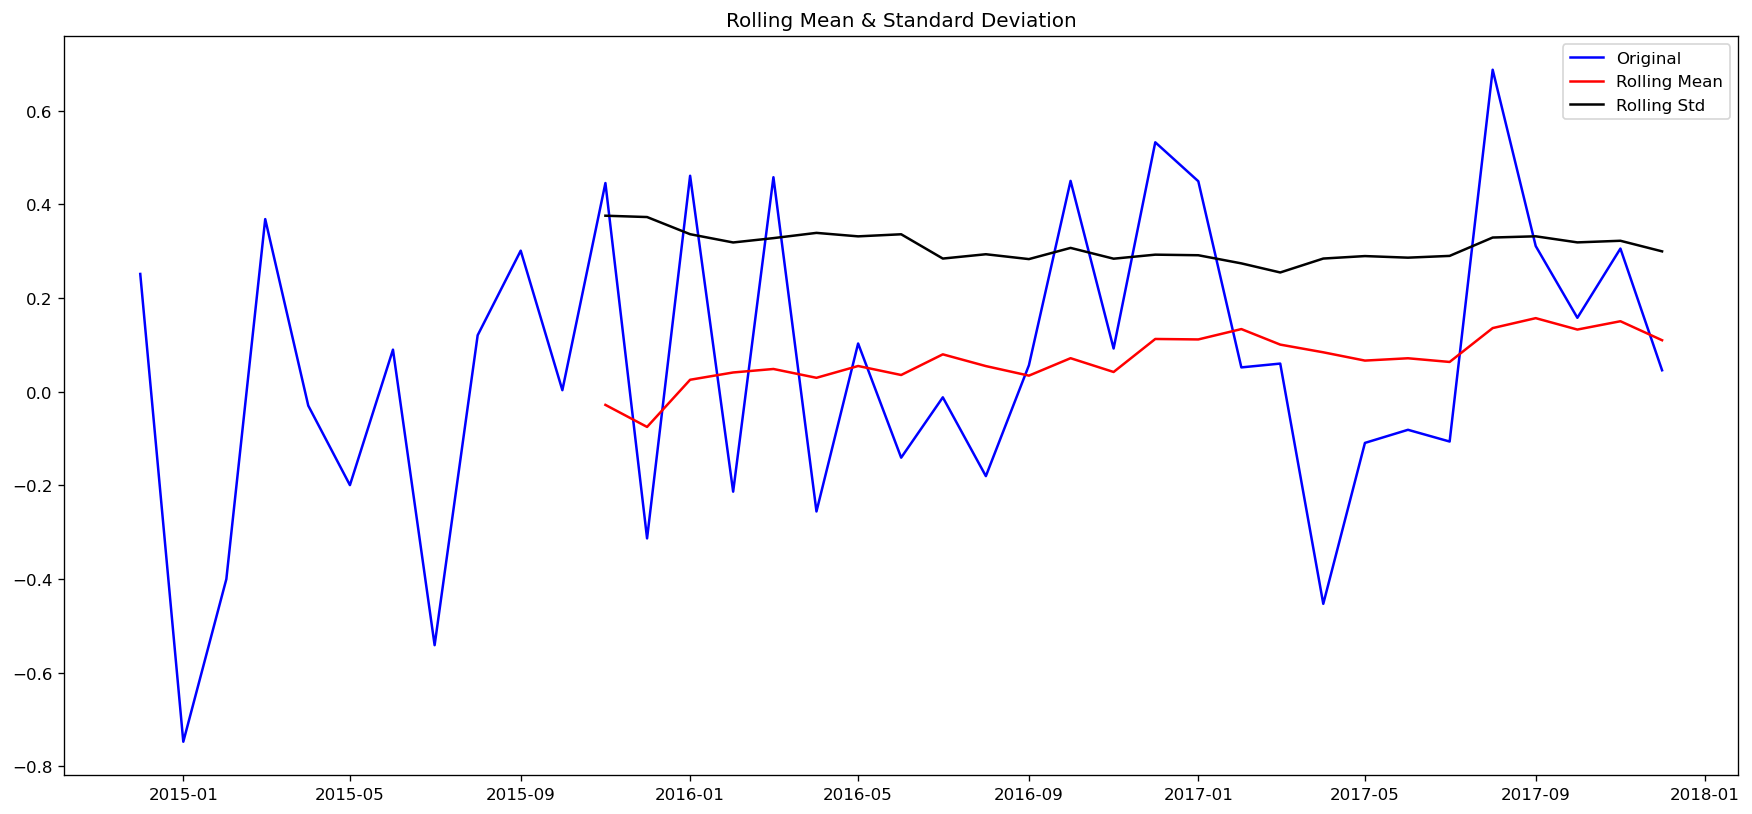

Results of Dickey-Fuller Test:
Test Statistic                 -3.409045
p-value                         0.010654
#Lags Used                      3.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


In [45]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

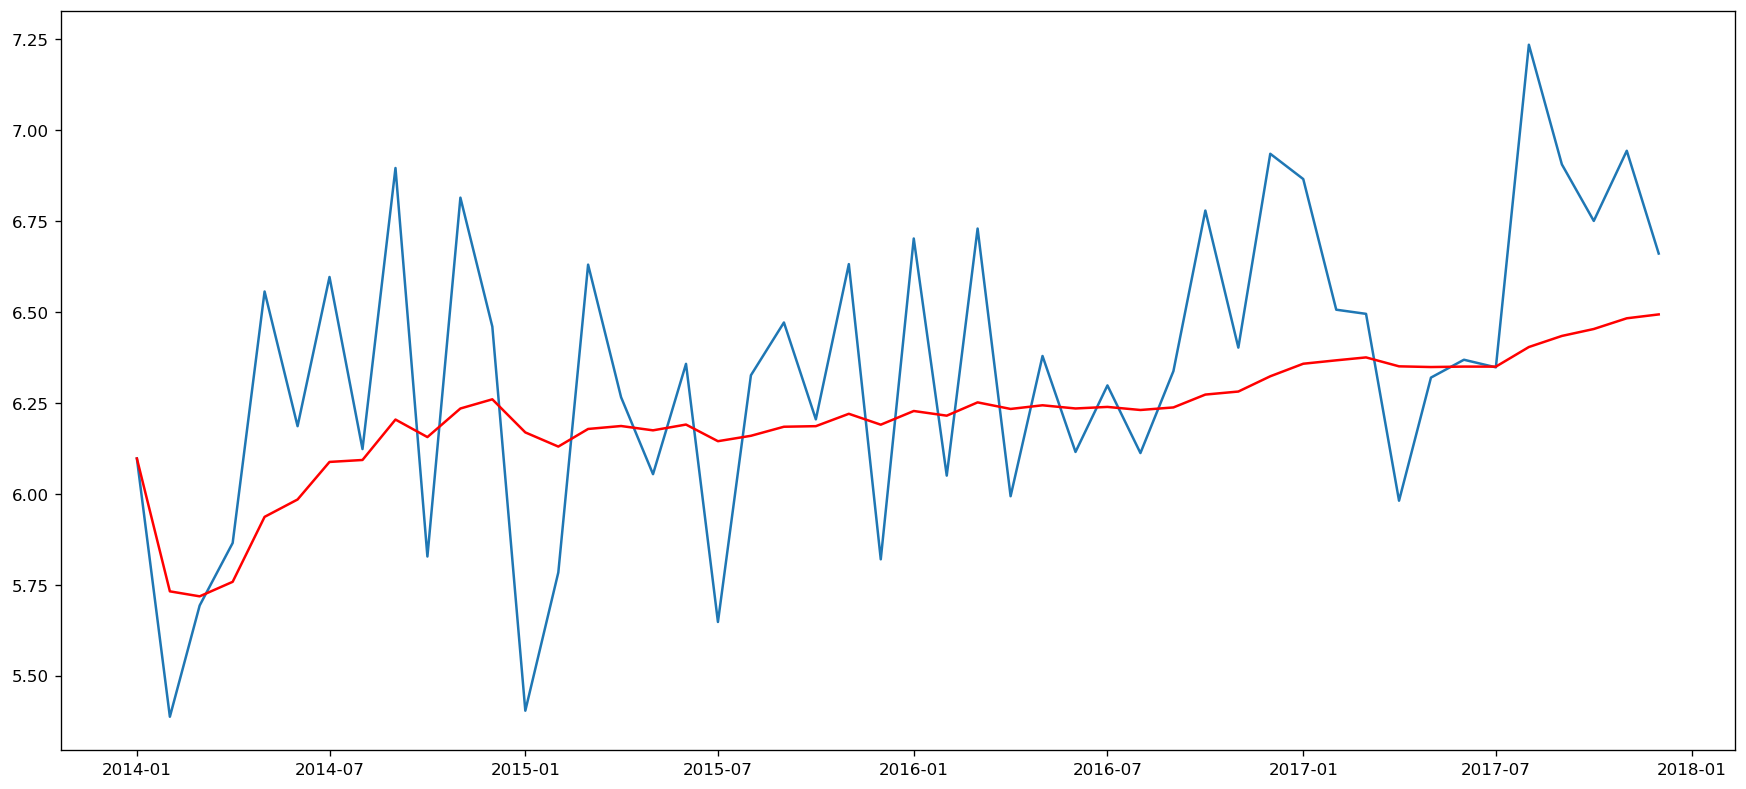

In [46]:
expwighted_avg = ts_log.ewm(halflife=12).mean()

plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

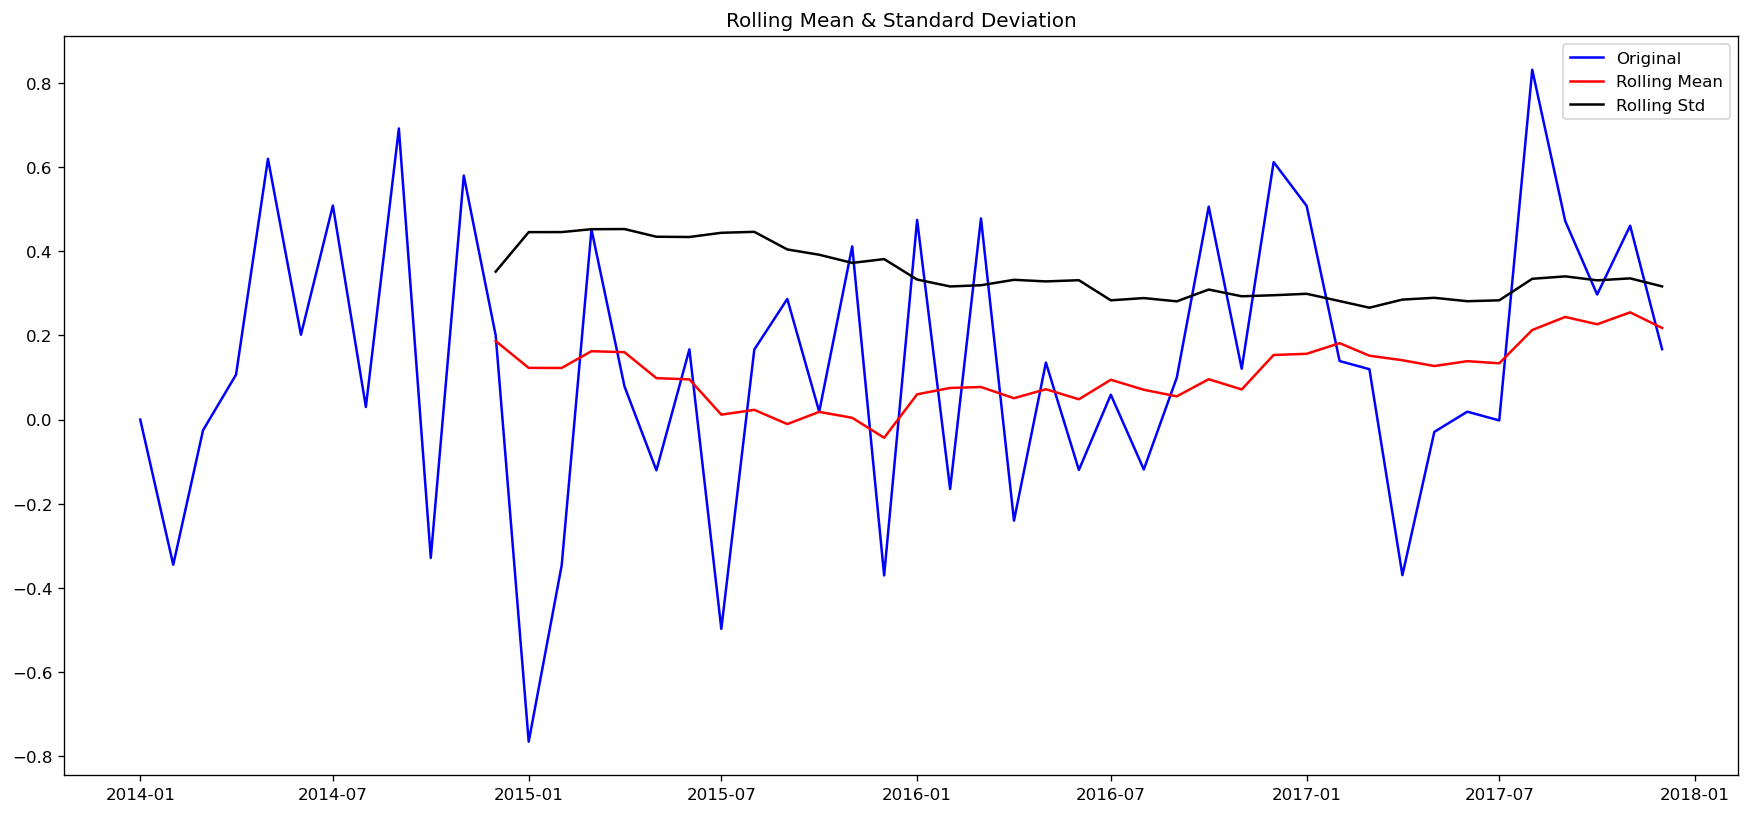

Results of Dickey-Fuller Test:
Test Statistic                -7.066915e+00
p-value                        5.052755e-10
#Lags Used                     0.000000e+00
Number of Observations Used    4.700000e+01
Critical Value (1%)           -3.577848e+00
Critical Value (5%)           -2.925338e+00
Critical Value (10%)          -2.600774e+00
dtype: float64


In [47]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

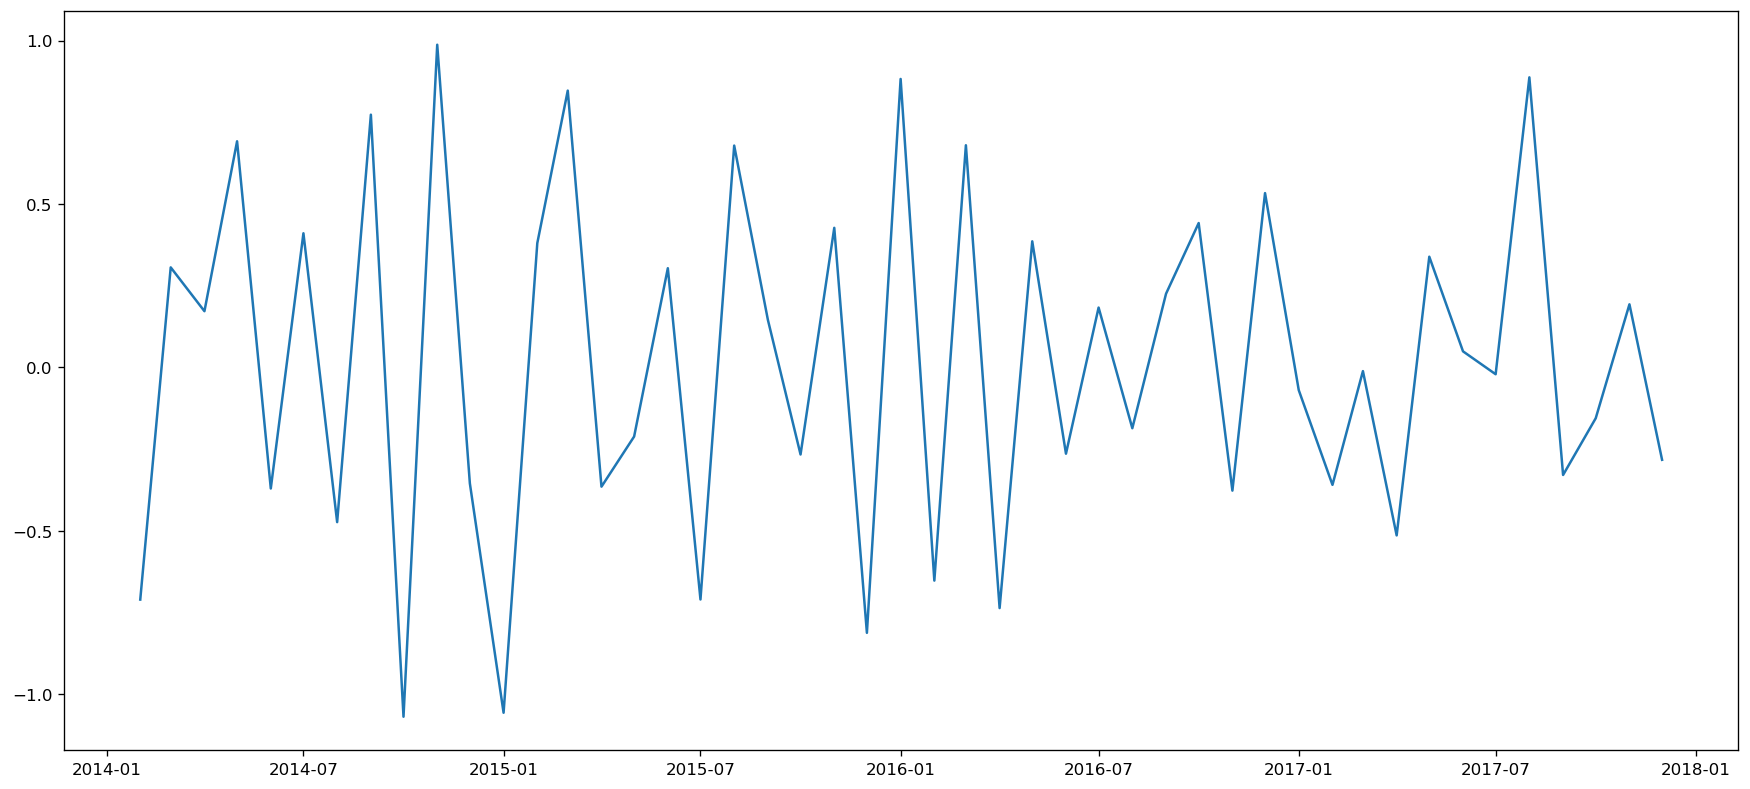

In [48]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

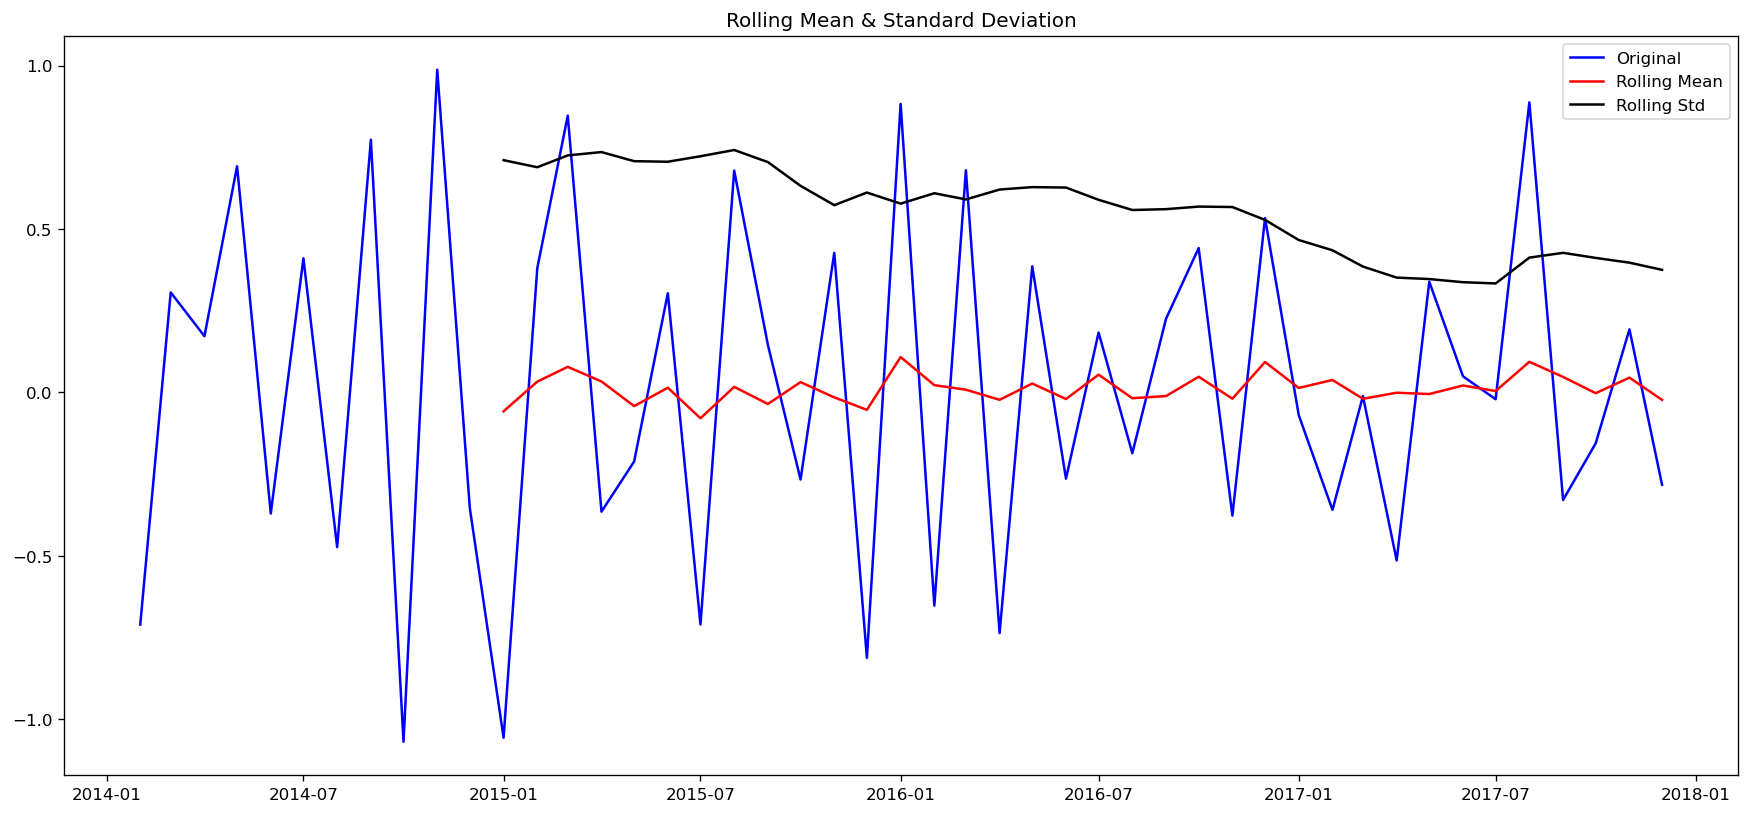

Results of Dickey-Fuller Test:
Test Statistic                 -4.927003
p-value                         0.000031
#Lags Used                      9.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


In [49]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

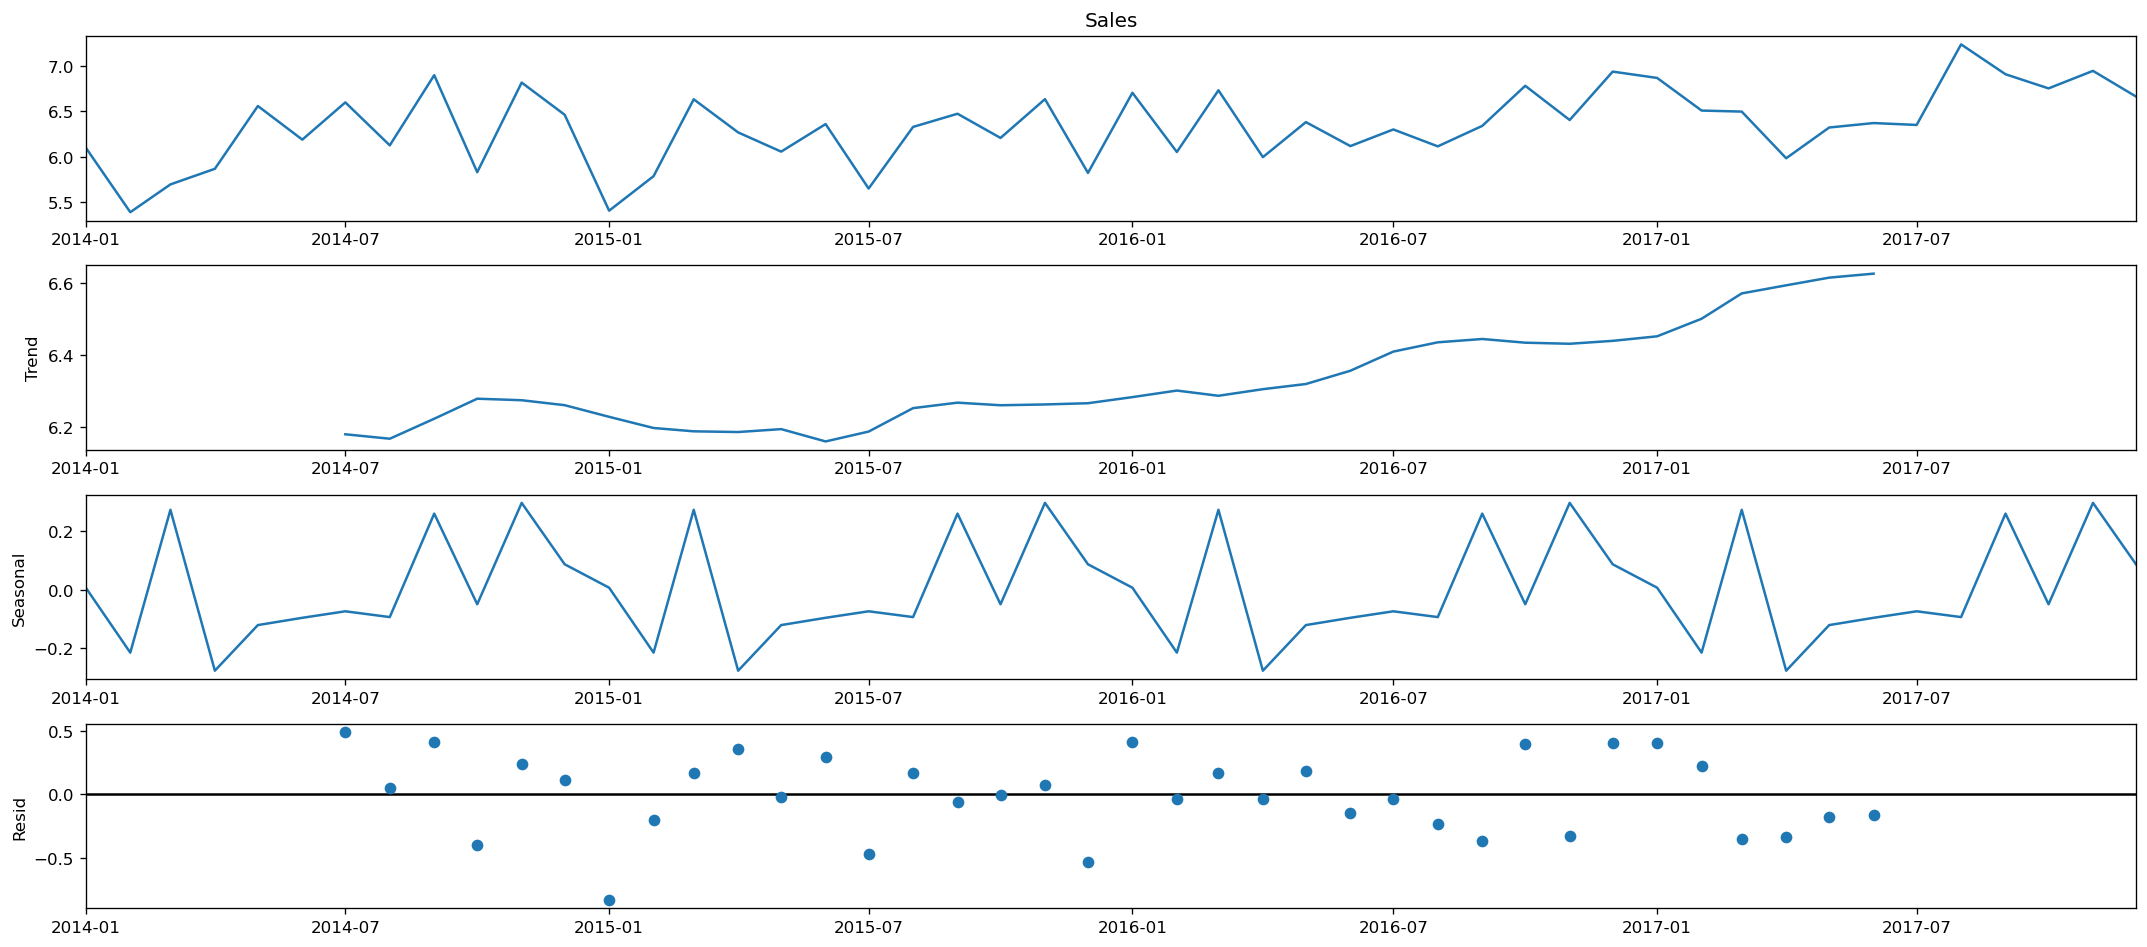

In [50]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(ts_log, model='additive')
fig = decomposition.plot()
plt.show()

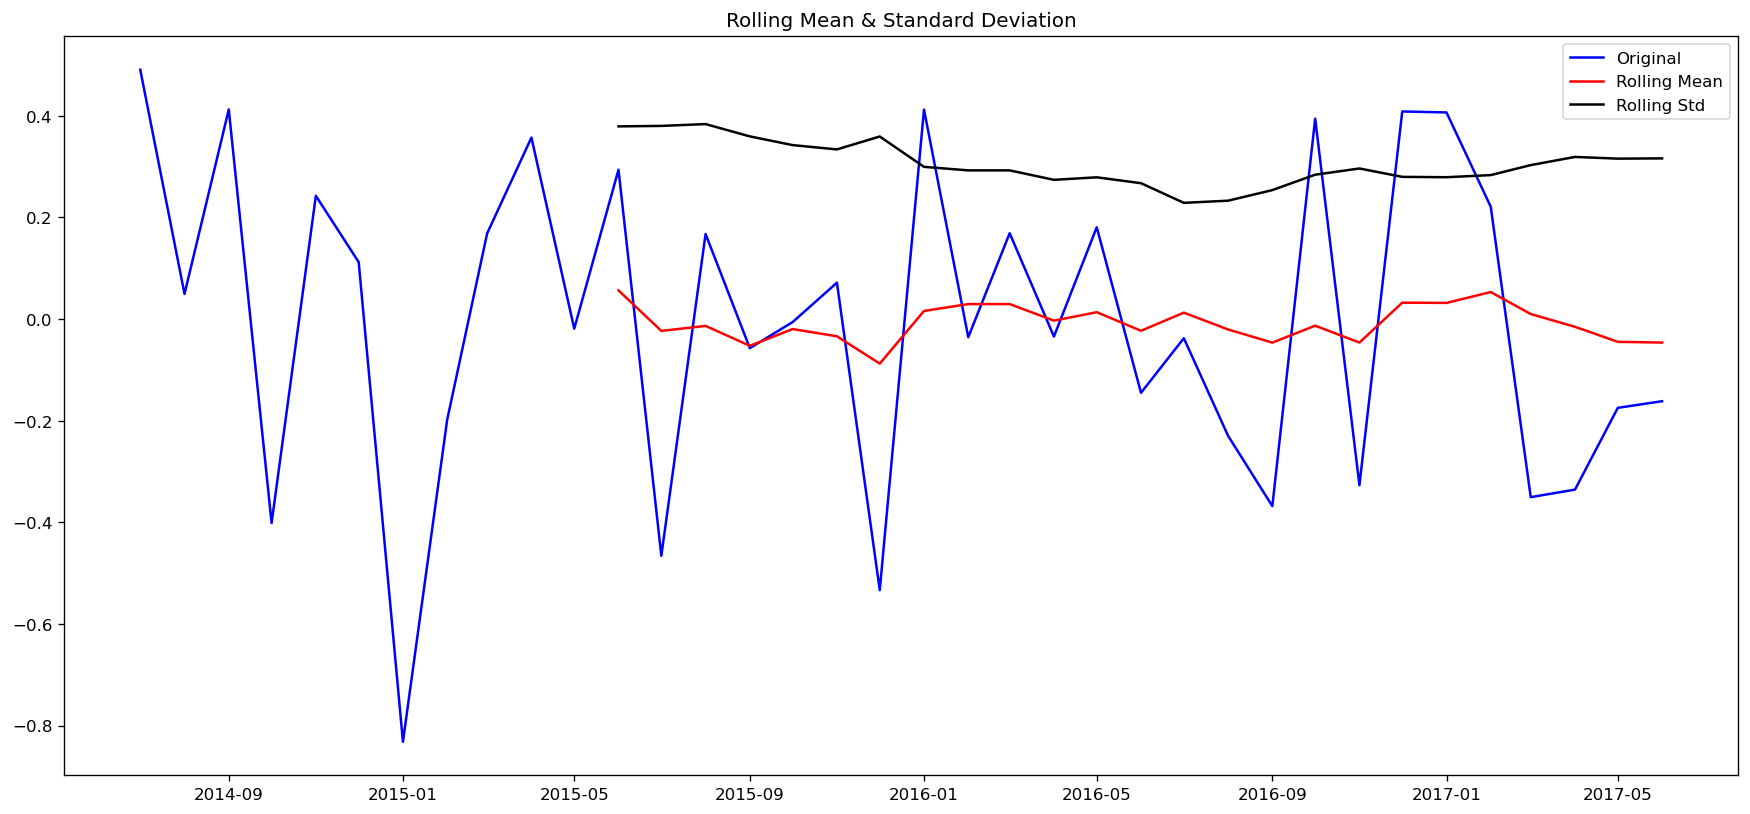

Results of Dickey-Fuller Test:
Test Statistic                 -1.771725
p-value                         0.394587
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)
residual = decomposition.resid

ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [52]:
train= y[:40]
test= y[40:]

In [53]:
!pip install pmdarima
import pmdarima

from pmdarima import auto_arima

In [54]:
 auto_arima(train, test='adf',seasonal=True, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.36 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=591.937, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=553.524, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=544.867, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=539.402, Time=0.05 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=540.040, Time=0.13 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=541.199, Time=0.12 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 1.310 seconds


ARIMA(order=(3, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [55]:
auto_arima(y,test='adf',       # use adftest to find optimal 'd'
                       # maximum p and q
                                 # frequency of series
                       # let model determine 'd'
                      seasonal=True,   # No Seasonality
                       

                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=667.343, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=668.848, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=669.133, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=669.808, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=761.850, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=666.065, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=665.671, Time=0.13 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=665.491, Time=0.21 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=668.156, Time=0.07 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=667.484, Time=0.28 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.14 sec

Best model:  ARIMA(0,0,3)(0,0,0)[0] intercept
Total fit time: 1.687 seconds


ARIMA(order=(0, 0, 3), scoring_args={}, suppress_warnings=True)

In [56]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train, order=(1,1,1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   40
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -265.831
Date:                Sat, 25 Mar 2023   AIC                            537.662
Time:                        16:53:51   BIC                            542.652
Sample:                    01-01-2014   HQIC                           539.452
                         - 04-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4576      0.207     -2.206      0.027      -0.864      -0.051
ma.L1         -0.4290      0.182     -2.362      0.018      -0.785      -0.073
sigma2      4.812e+04   1.34e+04      3.598      0.000    2.19e+04    7.43e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.53
Prob(Q):                              0.96   Prob(JB):                         0.77
Heteroskedasticity (H):               0.71   Skew:                            -0.12
Prob(H) (two-sided):                  0.54   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
pred= model.predict(start=len(train), end=(len(y)-1),dynamic=True)
pred

2017-05-01    675.521182
2017-06-01    547.542165
2017-07-01    606.107341
2017-08-01    579.307011
2017-09-01    591.571256
2017-10-01    585.958948
2017-11-01    588.527227
2017-12-01    587.351943
Freq: MS, Name: predicted_mean, dtype: float64

In [58]:
test

Order Date
2017-05-01     555.389769
2017-06-01     583.356154
2017-07-01     571.286040
2017-08-01    1387.569846
2017-09-01     998.474643
2017-10-01     854.620462
2017-11-01    1036.528154
2017-12-01     781.269786
Freq: MS, Name: Sales, dtype: float64

In [59]:
from  sklearn.metrics import mean_absolute_percentage_error

mape= mean_absolute_percentage_error(test, pred)

print('MAPE: %f' %mape)

MAPE: 0.290432


<AxesSubplot:xlabel='Order Date'>

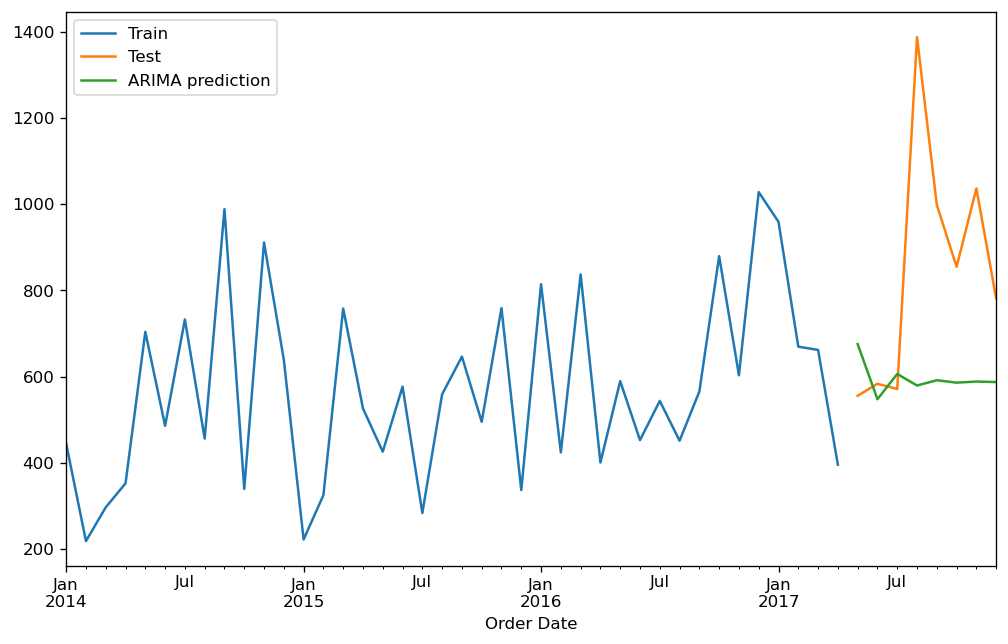

In [60]:
train.plot(legend=True, label='Train', figsize=(10,6))

test.plot(legend=True, label= 'Test')

pred.plot(legend=True, label='ARIMA prediction')

In [61]:
import statsmodels.api as sm
model1=sm.tsa.statespace.SARIMAX(train,order=(1, 1, 1),seasonal_order=(1,1,1,12))

results=model1.fit()
results.summary()

C:\Users\91744\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   40
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -190.022
Date:                            Sat, 25 Mar 2023   AIC                            390.044
Time:                                    16:54:56   BIC                            396.523
Sample:                                01-01-2014   HQIC                           391.971
                                     - 04-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1597      0.362     -0.441      0.659      -0.869       0.550
ma.L1         -0.9634      0.546     -1.765      0.078      -2.033       0.106
ar.S.L12       0.4046      0.679      0.596      0.551      -0.927       1.736
ma.S.L12      -0.9963      0.657     -1.517      0.129      -2.283       0.291
sigma2      5.327e+04   1.25e-05   4.26e+09      0.000    5.33e+04    5.33e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.81
Prob(Q):                              0.89   Prob(JB):                         0.67
Heteroskedasticity (H):               1.15   Skew:                             0.28
Prob(H) (two-sided):                  0.84   Kurtosis:                         2.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.68e+25. Standard errors may be unstable.
"""

In [62]:
pre=results.predict(start= len(train), end= (len(y)-1),dynamic=True)
pre

2017-05-01    699.669165
2017-06-01    572.123893
2017-07-01    641.918706
2017-08-01    567.533896
2017-09-01    758.753185
2017-10-01    805.188570
2017-11-01    784.193104
2017-12-01    931.367962
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Order Date'>

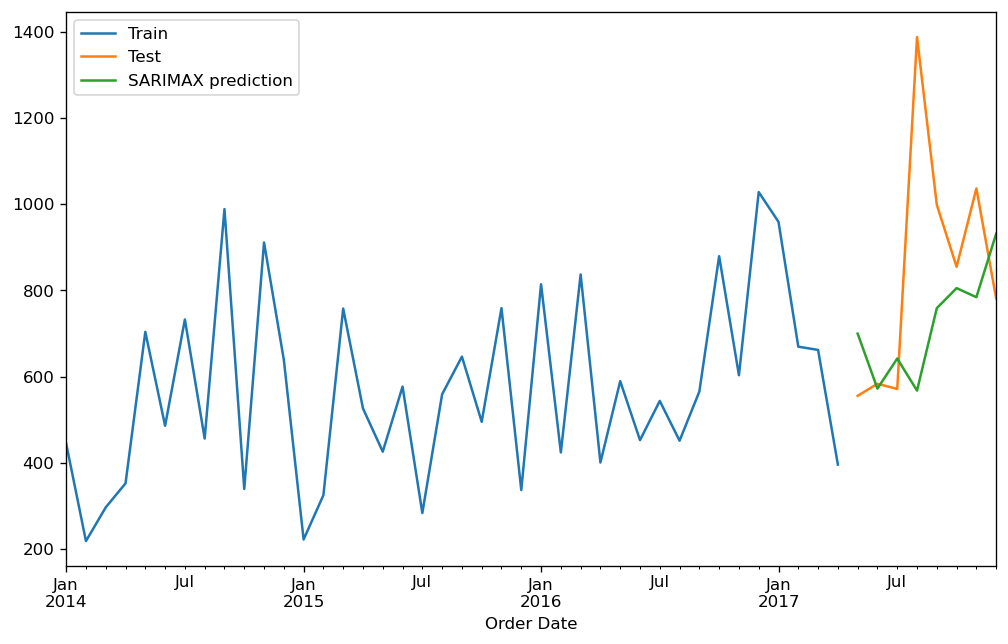

In [63]:
train.plot(legend=True, label='Train', figsize=(10,6))

test.plot(legend=True, label= 'Test')

pre.plot(legend=True, label='SARIMAX prediction')

In [64]:
mape= mean_absolute_percentage_error(test, pre)

print('MAPE1: %f' %mape)

MAPE1: 0.215894


In [65]:
future_sale= results.predict(start= len(y), end=(len(y)+12))
future_sale

2018-01-01    874.109348
2018-02-01    633.605839
2018-03-01    731.828291
2018-04-01    516.892643
2018-05-01    764.172024
2018-06-01    656.820196
2018-07-01    715.436972
2018-08-01    648.714628
2018-09-01    871.062196
2018-10-01    809.290252
2018-11-01    891.534568
2018-12-01    926.360572
2019-01-01    873.890174
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Order Date'>

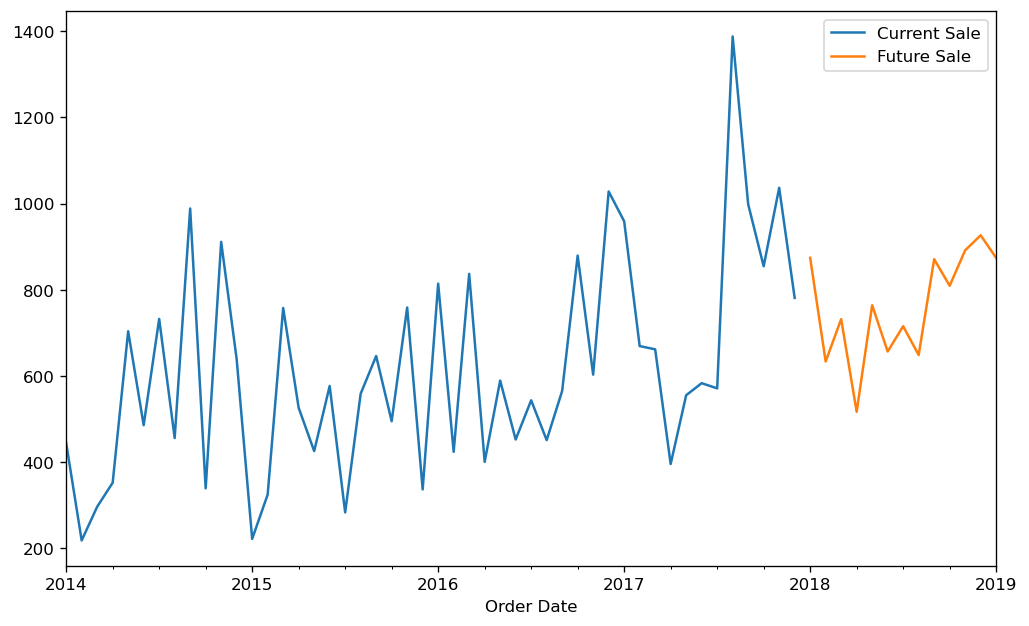

In [66]:
y.plot(legend=True, label='Current Sale', figsize=(10,6))

future_sale.plot(legend= True, label='Future Sale')